<a href="https://colab.research.google.com/github/Alexey-star-boss2024/-/blob/master/PROJECT_6__%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе.

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [4]:
data = pd.read_csv(
    "/content/data.csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [6]:
#внесите изменения в таблицу, убедитесь, что в наборе данных нет нулевых значений
data.isnull().sum()[data.isnull().sum() > 0]

,0
Description,1454
CustomerID,135080


In [7]:
#внесите изменения в таблицу, убедитесь, что в наборе данных нет нулевых значений#удалите все записи с любыми пробелами
data = data.dropna(axis=0,
                   how='any')

In [8]:
#проверьте, нет ли в наборе данных нулевых значений
data.isnull().sum()[data.isnull().sum() > 0]

,0


In [9]:
f'New Dimensions: {data.shape}'

'New Dimensions: (406829, 8)'

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [10]:
dupl_columns = list(data.columns)

d_mask = data.duplicated(subset=dupl_columns)
d_duplicates = data[d_mask]
print(f'Number of Duplicates: {d_duplicates.shape[0]}')

Number of Duplicates: 5225


In [11]:
#создайте новую таблицу, свободную от дубликатов
data = data.drop_duplicates(subset=dupl_columns)
print(f'New Dimensions without Duplicates: {data.shape}')

New Dimensions without Duplicates: (401604, 8)


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [12]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [13]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [14]:
print(f'{data.QuantityCanceled.isnull().sum()} transactions have no counterparty')

1303 transactions have no counterparty


In [15]:
#удалить все транзакции без указания контрагента
data = data.dropna(axis=0,
                   how='any')

In [16]:
list_index = []
for index, col in data.iterrows():
    if col['Quantity'] - col['QuantityCanceled'] == 0:
        list_index.append(index)
    if col['Quantity'] < 0:
        list_index.append(index)

data = data.drop(index=list_index,
                 axis=0)

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [17]:
#удалить все транзакции без указания контрагента
#выполнить поиск специальных транзакций
sp_char = '^[a-zA-Z]+'

special_trans = data.loc[data['StockCode'].str.contains(sp_char,
                                                        regex=True)]

special_trans['StockCode'].unique()

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [18]:
#найдите индекс специальных транзакций
sp_idx = data.loc[data['StockCode'].str.contains(sp_char,
                                                 regex=True)].index

data = data.drop(index=sp_idx,
                 axis=0)

In [19]:
print(f'New Dimensions: {data.shape}')

New Dimensions: (388640, 9)


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [20]:
zero_price = data[data['UnitPrice'] == 0].index

data = data.drop(index=zero_price,
                 axis=0)

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [21]:
data['TotalPrice'] = pd.Series(np.zeros(data.shape[0]),
                               index=data.index)

for index, col in data.iterrows():
    data['TotalPrice'].loc[index] = col['UnitPrice'] * (col['Quantity'] - col['QuantityCanceled'])

In [22]:
#экспортируйте таблицу
data.to_csv('C://Users/Thunderobot/Desktop/skillfactory/Project-6',
            index=False)

In [23]:
new_data = pd.read_csv('C://Users/Thunderobot/Desktop/skillfactory/Project-6')

In [24]:
new_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


In [25]:
print(f'Dimensions: {new_data.shape}')

Dimensions: (388607, 10)


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [26]:
#топ-5 стран с самыми высокими доходами
df_total_revenue = pd.DataFrame(new_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)[:5])
df_total_revenue

,TotalPrice
Country,
United Kingdom,6797691.44
Netherlands,283443.54
EIRE,247074.57
Germany,201520.71
France,181529.63


In [27]:
#создайте две диаграммы рядом друг с другом.
fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=('Distribution of Total Revenue by Top 5 Countries',
                    'Distribution of Total Revenue by Top 4 Countries')
    )


#создать столбчатую диаграмму
fig.add_trace(go.Bar(
    x=df_total_revenue.index,
    y=df_total_revenue['TotalPrice']),
              row=1,
              col=1)

#создать столбчатую диаграмму
fig.add_trace(go.Bar(
    x=df_total_revenue[1:].index,
    y=df_total_revenue[1:]['TotalPrice']),
              row=2,
              col=1)

#установите характеристики
fig.update_layout(width=1100,
                  height=500,
                  showlegend=False)


Вывод:
Наибольший доход поступает из Великобритании, доход от 2 до 4 других стран-лидеров превышает всего лишь более 180-200 тыс., в то время как доход Великобритании составляет почти 6,8 млн.

In [28]:
#установленные характеристики
#распределение доходов по странам
uk_rev = new_data[new_data['Country'] == 'United Kingdom']
netherlands_rev = new_data[new_data['Country'] == 'Netherlands']
eire_rev = new_data[new_data['Country'] == 'EIRE']
germany_rev = new_data[new_data['Country'] == 'Germany']
france_rev = new_data[new_data['Country'] == 'France']

#создайте параллельные графики
fig = make_subplots(rows=5,
                    cols=1)

#первый график
fig.add_trace(
    go.Box(x=uk_rev['TotalPrice'], name='United Kingdom'),
    row=1, col=1
)

#второй график
fig.add_trace(
    go.Box(x=netherlands_rev['TotalPrice'], name='Netherlands'),
    row=2, col=1
)

#третий график
fig.add_trace(
    go.Box(x=eire_rev['TotalPrice'], name='EIRE'),
    row=3, col=1
)

#четверный график
fig.add_trace(
    go.Box(x=germany_rev['TotalPrice'], name='Germany'),
    row=4, col=1
)

#пятый график
fig.add_trace(
    go.Box(x=france_rev['TotalPrice'], name='France'),
    row=5, col=1
)

#установите те же пределы по осям
fig.update_xaxes(range=[0, 200])


#установите характеристики
fig.update_layout(height=500,
                  width=1100,
                  showlegend=False,
                  title_text='Distribution of Revenue by Country',

)

Вывод:
Средний доход от одной покупки не превышает отметки 20,0 для трех ведущих стран, а для Великобритании он даже ниже — 10,2. Нидерланды — страна с самым высоким средним доходом и самым большим диапазоном между самой низкой и самой высокой ценой покупки.
Во всех ведущих странах наблюдается большое количество выбросов, указывающих на разное покупательские корзины.

In [29]:
#топ-5 стран с самыми высокими продажами
df_total_sales = pd.DataFrame(new_data.groupby('Country').count().sort_values(by='InvoiceNo',
                                                                              ascending=False)[:5]).iloc[:, :1]
df_total_sales

,InvoiceNo
Country,
United Kingdom,346805
Germany,8591
France,7961
EIRE,7011
Spain,2393


In [30]:
#создайте две диаграммы рядом друг с другом.
fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=('Distribution of Total Sales by Top 5 Countries',
                    'Distribution of Total Sales by Top 4 Countries')
    )

#создайте столбчатую диаграмму
fig.add_trace(go.Bar(
    x=df_total_sales.index,
    y=df_total_sales['InvoiceNo']),
              row=1,
              col=1)

#создайте столбчатую диаграмму
fig.add_trace(go.Bar(
    x=df_total_sales[1:].index,
    y=df_total_sales[1:]['InvoiceNo']),
              row=2,
              col=1)

#установите характеристики
fig.update_layout(width=1100,
                  height=500,
                  showlegend=False)

Вывод:
Наибольшее количество покупок поступает из Великобритании, доход от 2 до 4 других стран-лидеров превышает всего лишь чуть больше чем 7 тыс., в то время как количество покупок Великобритании составляет более 345 тыс.

Какие страны приносят наибольшую сезонную выручку?

In [31]:
#преобразовать в дату и время
new_data['InvoiceDate'] = pd.to_datetime(new_data['InvoiceDate'])

#преобразовать в дату и время
new_data['Quarter'] = new_data['InvoiceDate'].dt.quarter

#получите данные за 1 квартал
df_quarter_one = new_data[new_data['Quarter'] == 1]
df_quarter_one_rvn = df_quarter_one.groupby(by=['Country', 'Quarter'])['TotalPrice'].sum().sort_values(ascending=False)[:5]
df_quarter_one_rvn = df_quarter_one_rvn.unstack().reset_index().rename_axis(None, axis=1)
df_quarter_one_rvn = df_quarter_one_rvn.rename(columns={1: 'TotalPrice'})

#получить данные за 2 квартал
df_quarter_two = new_data[new_data['Quarter'] == 2]
df_quarter_two_rvn = df_quarter_two.groupby(by=['Country', 'Quarter'])['TotalPrice'].sum().sort_values(ascending=False)[:5]
df_quarter_two_rvn = df_quarter_two_rvn.unstack().reset_index().rename_axis(None, axis=1)
df_quarter_two_rvn = df_quarter_two_rvn.rename(columns={2: 'TotalPrice'})

#получить данные за 3 квартал
df_quarter_three = new_data[new_data['Quarter'] == 3]
df_quarter_three_rvn = df_quarter_three.groupby(by=['Country', 'Quarter'])['TotalPrice'].sum().sort_values(ascending=False)[:5]
df_quarter_three_rvn = df_quarter_three_rvn.unstack().reset_index().rename_axis(None, axis=1)
df_quarter_three_rvn = df_quarter_three_rvn.rename(columns={3: 'TotalPrice'})

#получить данные за 4 квартал
df_quarter_four = new_data[new_data['Quarter'] == 4]
df_quarter_four_rvn = df_quarter_four.groupby(by=['Country', 'Quarter'])['TotalPrice'].sum().sort_values(ascending=False)[:5]
df_quarter_four_rvn = df_quarter_four_rvn.unstack().reset_index().rename_axis(None, axis=1)
df_quarter_four_rvn = df_quarter_four_rvn.rename(columns={4: 'TotalPrice'})

In [32]:
#создайте две диаграммы рядом друг с другом.
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=('Distribution of Quarter 1 Sales by Top 5 Countries',
                    'Distribution of Quarter 2 Sales by Top 5 Countries',
                    'Distribution of Quarter 3 Sales by Top 5 Countries',
                    'Distribution of Quarter 4 Sales by Top 5 Countries'
                    )
    )


#1-й график
fig.add_trace(
    go.Bar(x=df_quarter_one_rvn['TotalPrice'],
           y=df_quarter_one_rvn['Country'],
           orientation='h'),
    row=1, col=1
)


#2-й график
fig.add_trace(
    go.Bar(x=df_quarter_two_rvn['TotalPrice'],
           y=df_quarter_two_rvn['Country'],
           orientation='h'),
    row=1, col=2
)


#3-й график
fig.add_trace(
    go.Bar(x=df_quarter_three_rvn['TotalPrice'],
           y=df_quarter_three_rvn['Country'],
           orientation='h'),
    row=2, col=1
)

#4-й график
fig.add_trace(
    go.Bar(x=df_quarter_four_rvn['TotalPrice'],
           y=df_quarter_four_rvn['Country'],
           orientation='h'),
    row=2, col=2
)

#установите те же пределы по осям
fig.update_xaxes(range=[0, 2550000])

#установите характеристики
fig.update_layout(width=1180,
                  height=500,
                  showlegend=False)

Присутствует ли в продажах сезонность (когда покупают чаще)?

Вывод:
Клиенты из Великобритании демонстрируют кумулятивную модель поведения: каждый квартал имеет более высокие продажи, чем предыдущий; другие страны демонстрируют иные модели поведения, например, у EIRE самые высокие покупки в 3-м квартале.
Не все страны остаются в первой пятерке в течение всего года, если рассматривать квартал за кварталом.

Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

In [33]:
#создайте новые функции даты и времени: месяц, день месяца, день недели и ча
new_data['Month'] = new_data['InvoiceDate'].dt.month
new_data['Day'] = new_data['InvoiceDate'].dt.day
new_data['WeekDay'] = new_data['InvoiceDate'].dt.dayofweek
new_data['Hour'] = new_data['InvoiceDate'].dt.hour

In [34]:
#подсчитайте продажи по месяцам
df_monthly_sales = new_data.groupby('Month')['InvoiceNo'].count().round()

#создайте гистограмму
fig = px.bar(
    data_frame=df_monthly_sales,
    x=df_monthly_sales.index,
    y='InvoiceNo',
    color='InvoiceNo',
    width=1100,
    height=500,
    color_continuous_scale='brwnyl',
    title='Distribution of Monthly Sales',
)

#установите название оси и границы по оси y
fig.update_layout(
    xaxis_title_text='Month',
    yaxis_title_text='Number of Sales',
)

Вывод:
Самые высокие продажи приходятся на 4-й квартал, а самые высокие показатели — в ноябре, т.е. вероятнее всего, клиенты покупают заранее к Рождеству и Новому Году.

In [35]:
#подсчитайте продажи по дням месяца
df_daily_sales = new_data.groupby('Day')['InvoiceNo'].count().round()

#создайте столбчатую диаграмму
fig = px.bar(
    data_frame=df_daily_sales,
    x=df_daily_sales.index,
    y='InvoiceNo',
    color='InvoiceNo',
    width=1100,
    height=500,
    color_discrete_sequence='olive',
    title='Distribution of Daily Sales',
)

#установите название оси и границы по оси y
fig.update_layout(
    xaxis_title_text='Day',
    yaxis_title_text='Number of Sales',
)

Вывод:
Довольно случайное распределение продаж в днях, трудно сделать предположение.

In [36]:
#подсчитайте продажи по дням недели
df_week_sales = new_data.groupby('WeekDay')['InvoiceNo'].count().round()

#создайте столбчатую диаграмму
fig = px.bar(
    data_frame=df_week_sales,
    x=df_week_sales.index,
    y='InvoiceNo',
    color='InvoiceNo',
    width=1100,
    height=500,
    color_discrete_sequence='salmon',
    title='Distribution of Week Day Sales',
)

#установите название оси и границы по оси y
fig.update_layout(
    xaxis_title_text='Week Day',
    yaxis_title_text='Number of Sales',
)

Вывод:
Большинство покупок совершается в начале недели с понедельника по четверг, растет кумулятивно, с самым высоким показателем в четверг. По данным в субботу не было совершено ни одной покупки.

In [37]:
# строим сводную таблицу и вычисляем по ней среднее количество заказов в час
hourly_sales = new_data.pivot_table(
    values='StockCode',
    index='InvoiceDate',
    columns='Hour',
    aggfunc='count',
    fill_value=0
).mean().round(2)

#создайте столбчатую диаграмму
fig = px.bar(
    data_frame=hourly_sales,
    x=hourly_sales.index,
    y=hourly_sales.values,
    color=hourly_sales.values,
    width=1100,
    height=500,
    color_discrete_sequence='magenda',
    title='Distribution of Average Hourly Sales',
)

#установите название оси и границы по оси y
fig.update_layout(
    xaxis_title_text='Hour',
    yaxis_title_text='Number of Average Sales',
)

Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

Вывод:
Наибольшее количество заказов совершается в период с 12.00 до 13.00, связано с тем, что клиенты совершают заказы в обеденный перерыв и много свободного времяни в выходные дни, а также среднее количество по часам имеет форму нормального распределения.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [38]:
recency_data = new_data.groupby('CustomerID')['InvoiceDate'].max().reset_index()

recency_data['Recency'] = pd.to_datetime('2011-12-10') - recency_data['InvoiceDate']

recency_data['Recency'] = recency_data['Recency'].dt.days

rfm_table = pd.DataFrame({
    'Recency': recency_data['Recency'].values,
    'Frequency': new_data.groupby('CustomerID')['InvoiceNo'].nunique(),
    'Monetary': new_data.groupby('CustomerID')['TotalPrice'].sum()
})

In [39]:
print(f"customers who placed an order more than 200 days ago: {rfm_table[rfm_table['Recency'] > 200].shape[0]}")
print(f"average number of orders per year: {round(rfm_table['Frequency'].mean())}")
print(f"purchase amount by customer №12360: £{round(rfm_table.loc[12360]['Monetary'])}")

customers who placed an order more than 200 days ago: 742
average number of orders per year: 4
purchase amount by customer №12360: £2302


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [40]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)

fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [41]:
#set the limits for frequency and monetary
freq_bound = np.quantile(rfm_table['Frequency'], 0.95)
monetary_bound = np.quantile(rfm_table['Monetary'], 0.95)

#set the limits
rfm_table = rfm_table[~((rfm_table['Frequency'] > freq_bound) | (rfm_table['Monetary'] > monetary_bound))]
rfm_table.shape

(4035, 3)

In [42]:
#создавайте параллельные участки
fig = make_subplots(rows=1,
                    cols=3)

#первый график: recency
fig.add_trace(
    go.Box(x=rfm_table.iloc[:, 0].values,
           name='Recency'),
    row=1, col=1
)

#второй график:: frequency
fig.add_trace(
    go.Box(x=rfm_table.iloc[:, 1].values,
           name='Frequency'),
    row=1, col=2
)

#третий график: monetary
fig.add_trace(
    go.Box(x=rfm_table.iloc[:, 2].values,
           name='Monetary'),
    row=1, col=3
)


#установите характеристики
fig.update_layout(height=350,
                  width=1170,
                  showlegend=False,
                  title_text='Distribution of Recency, Frequency, and Monetary',

)

Вывод:
После удаления выбросов графики имеют характерную форму, но выбросы все еще присутствуют.

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [43]:
pip install scikit-learn

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn import preprocessing

In [46]:
from sklearn.decomposition import PCA

In [47]:
from sklearn import pipeline

### Понижение размерности PCA

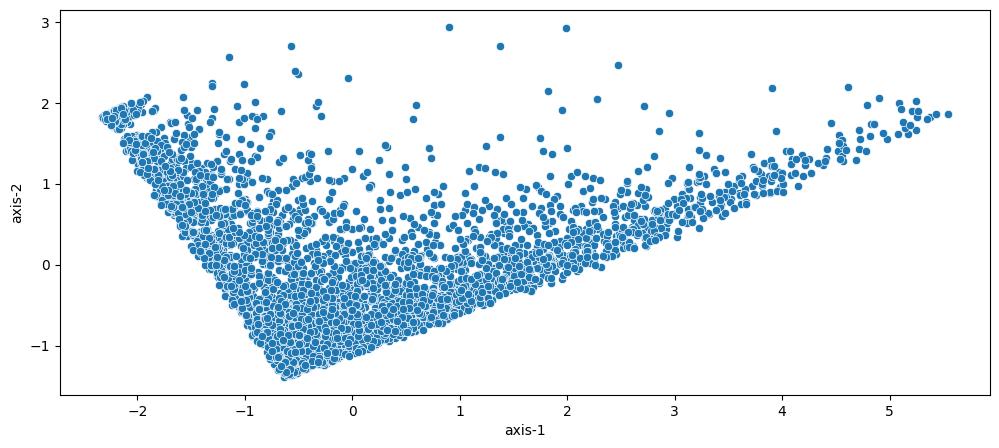

In [48]:
# инициализация алгоритма стандартизации
scaler = preprocessing.StandardScaler()
# инициализация алгоритма pca
pca = PCA(n_components=2, random_state=42)
# инициализация и применение pipeline
pipe = pipeline.Pipeline(steps=[('scaler', scaler), ('pca', pca)])
rfm_table_processed = pipe.fit_transform(rfm_table)
# инициализаия таблицы со сниженной размерностью алгоритмом t-sne
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns=['axis-1', 'axis-2'])
# построение графика для отображения данных с пониженной размерностью
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2');

Вывод: Можно увидеть на графике выше, что понижение размерности методом PCA плохо выделяет кластеры, следовательно нам данный метод не подходит

### Понижение размерности t-SNE

In [49]:
from sklearn.manifold import TSNE

In [50]:
pip uninstall pandas pip install pandas

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/pandas-2.2.2.dist-info/*
    /usr/local/lib/python3.12/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.2.2
Found existing installation: pip 24.1.2
Uninstalling pip-24.1.2:
  Would remove:
    /usr/local/bin/pip
    /usr/local/bin/pip3
    /usr/local/bin/pip3.12
    /usr/local/lib/python3.12/dist-packages/pip-24.1.2.dist-info/*
    /usr/local/lib/python3.12/dist-packages/pip/*
Proceed (Y/n)? y
  Successfully uninstalled pip-24.1.2


In [51]:
import pandas as pd

Значение дивергенции Кульбака — Лейблера: 0.52


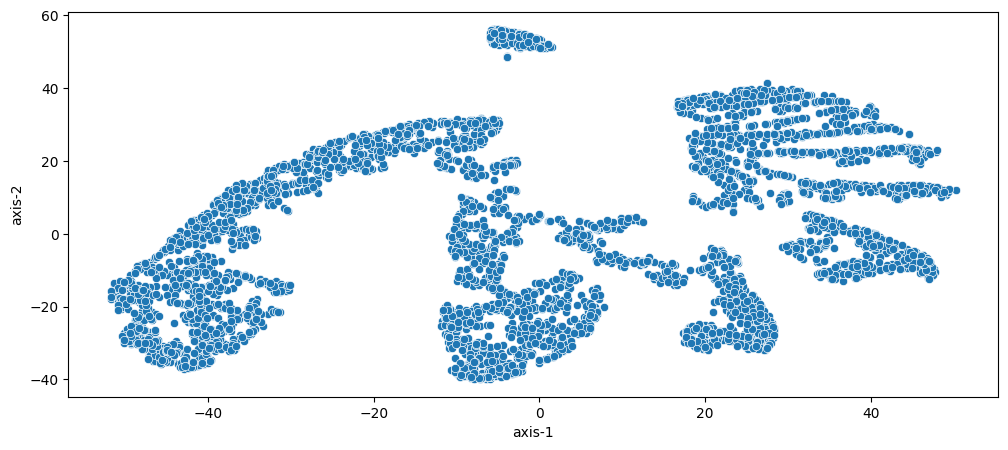

In [52]:
# инициализация алгоритма t-sne
t_sne = TSNE(n_components=2, random_state=42, perplexity=60)
# инициализация и применение pipeline
pipe = pipeline.Pipeline(steps=[('scaler', scaler), ('t_sne', t_sne)])
rfm_table_processed = pipe.fit_transform(rfm_table)
print(f"Значение дивергенции Кульбака — Лейблера: {round(pipe[1].kl_divergence_, 2)}")
# инициализаия таблицы со сниженной размерностью алгоритмом t-sne
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns=['axis-1', 'axis-2'])
# построение графика для отображения данных с пониженной размерностью
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2');

Вывод: Можно увидеть на графике, что метод t-sne хорошо выделяет кластеры и убирает шум, следовательно в дальнейшем будем использовать его, как метод понижения размерности.

### 1. KMeans-алгоритм

In [53]:
from sklearn.cluster import KMeans

In [54]:
from sklearn.metrics import silhouette_score

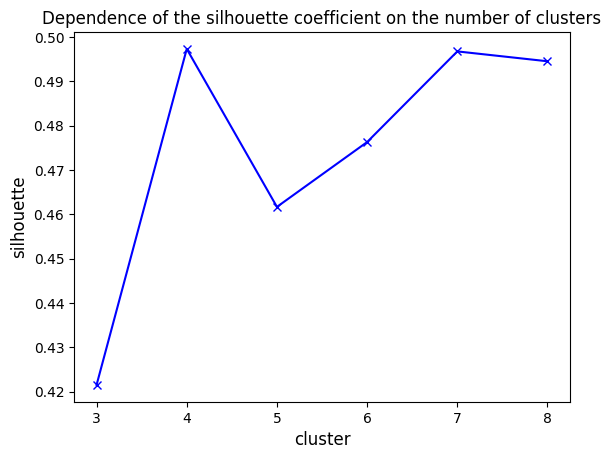

In [55]:
def get_silhouette_km(cluster_num, rfm):
    """Функция для определения коэффициента силуэта алогиртма kmeans в зависимости от количества кластеров
    Args:
        cluster_num (int): количество кластеров
        rfm (DataFrame): RFM-таблица
    Returns:
        silhouette (float): коэффициент силуэта
    """
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(rfm)
    silhouette = silhouette_score(rfm, k_means.labels_, metric='euclidean')
    return silhouette
# инициализация списка для коэффициентов силуэта
silhouettes = []
# цикл для заполнения списка коэффициентами силуэта алгоритма KMeans при разном количестве кластеров
for i in range(3, 9):
    silhouettes.append(get_silhouette_km(i, rfm_table_processed))
# построение графика зависимоти коэффициента силуэта от количества кластеров алгоритма KMeans
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.title('Dependence of the silhouette coefficient on the number of clusters', fontsize=12)
plt.plot([i for i in range(3, 9)], silhouettes, 'xb-')

Вывод: Из графика видно, что оптимальное количество кластеров - 7, потому что коэффициент силуэта максимален в данной точке.

Коэффициент силуэта: 0.497


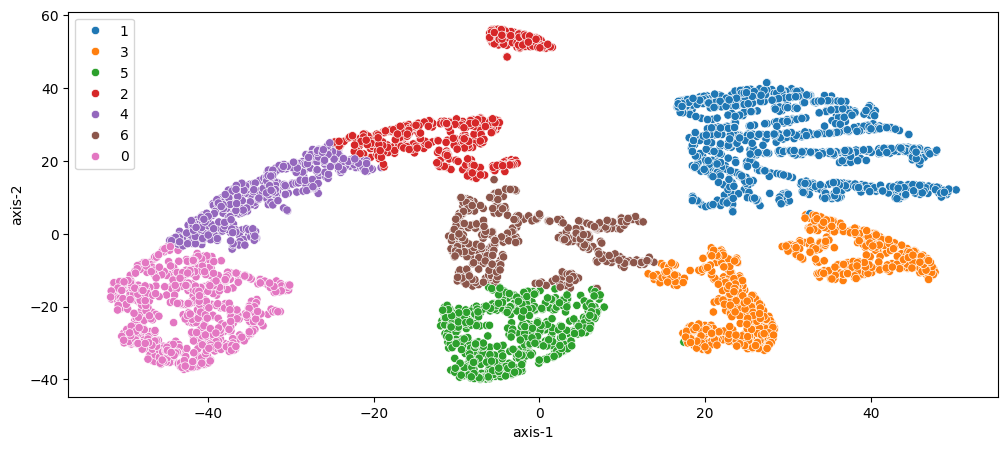

In [56]:
# KMeans с оптимальным количеством кластеров
k_means =  KMeans(n_clusters=7, random_state=42)
k_means.fit(rfm_table_processed)
# присваивание метки алгоритма KMeans строкам очищенной rfm-таблице
rfm_table.loc[:, 'KMeans_label'] = k_means.labels_
# расчет коэффициента силуэта
print('Коэффициент силуэта:', round(silhouette_score(rfm_table_processed, k_means.labels_, metric='euclidean'), 3))
# Построение диаграммы рассеивания для алгоритма KMeans
fig = plt.figure(figsize=(12,5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y = 'axis-2', hue=k_means.labels_.astype('str'));

### 2. EM-алгоритм

In [57]:
from sklearn.mixture import GaussianMixture

In [58]:
# инициализация списка с значениями коэффициентов силуэта
siliuette_list_em = []
# цикл для фиксациии коэффициента силуета ЕМ-алгоритма от 3 до 8 кластеров
for cluster_num in range(3,9):
    em = GaussianMixture(n_components=cluster_num, random_state=42).fit_predict(rfm_table_processed)
    sil_score = silhouette_score(rfm_table_processed, em, metric='euclidean')
    siliuette_list_em.append((cluster_num, sil_score,len(set(em)) ) )
# инициализация датафрейма со значениями коэффициентов силуета и количеством кластеров
df_em = pd.DataFrame(siliuette_list_em, columns=['cluster', 'sil_score','number_of_clusters'])
# сортировка датафрейма со значениями коэффициентов силуета и количеством кластеров
df_em.sort_values(by = 'sil_score')

,cluster,sil_score,number_of_clusters
0,3,0.371888,3
2,5,0.393058,5
4,7,0.403149,7
5,8,0.410042,8
3,6,0.432606,6
1,4,0.471409,4


Вывод: Из таблицы видно, что оптимальное количество кластеров - 7, потому что коэффициент силуэта максимален при данном колчестве кластеров.

Коэффициент силуэта: 0.471


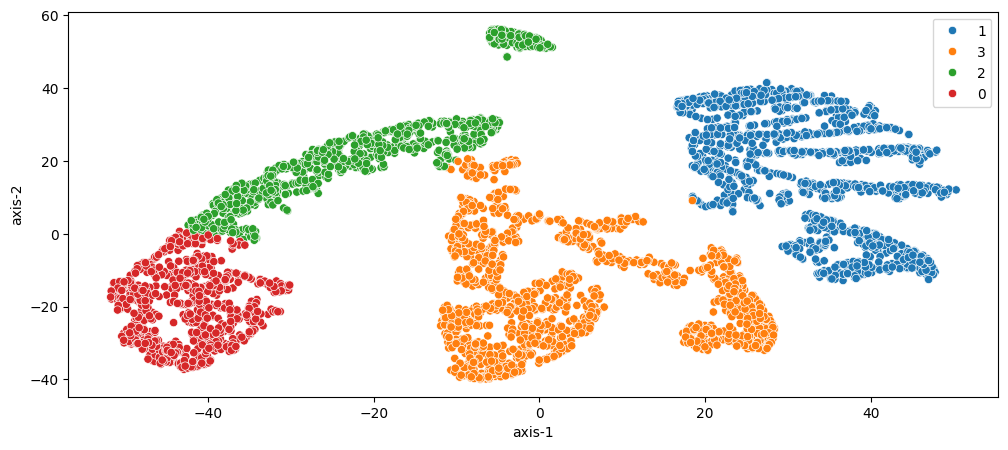

In [59]:
# Инциализация и запуск алгоритма EM с оптимальным числом кластеров
em = GaussianMixture(n_components=4, random_state=42)
em.fit(rfm_table_processed)
labels = em.predict(rfm_table_processed)
# присваивание метки алгоритма EM строкам очищенной rfm-таблице
rfm_table['EM_label']= labels
# расчет коэффициента силуэта
print('Коэффициент силуэта:', round(df_em['sil_score'].max(), 3))
# Построение диаграммы рассеивания для алгоритма EM
fig = plt.figure(figsize=(12,5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y = 'axis-2', hue=labels.astype('str'));

In [60]:
#set the limits for frequency and monetary
freq_bound = np.quantile(rfm_table['Frequency'], 0.95)
monetary_bound = np.quantile(rfm_table['Monetary'], 0.95)

#set the limits
rfm_table = rfm_table[~((rfm_table['Frequency'] > freq_bound) | (rfm_table['Monetary'] > monetary_bound))]
rfm_table.shape

(3754, 5)

### 3. AgglomearariveClustering - алгоритм

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [62]:
# инициализация списка с значениями коэффициентов силуэта
siliuette_list_hierarchical = []
# цикл для фиксациии коэффициента силуета AgglomerativeClustering-алгоритма от 3 до 8 кластеров
for cluster in range(3,9):
    agglomerative = AgglomerativeClustering(n_clusters=cluster).fit_predict(rfm_table_processed)
    sil_score = silhouette_score(rfm_table_processed, agglomerative, metric='euclidean')
    siliuette_list_hierarchical.append((cluster, sil_score,len(set(agglomerative)) ) )
# инициализация датафрейма со значениями коэффициентов силуета и количеством кластеров
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','number_of_clusters'])
# сортировка датафрейма со значениями коэффициентов силуета и количеством кластеров
df_hierarchical.sort_values(by = 'sil_score')

,cluster,sil_score,number_of_clusters
0,3,0.393198,3
1,4,0.432819,4
2,5,0.467677,5
3,6,0.470683,6
5,8,0.484191,8
4,7,0.487479,7


Вывод: Из таблицы видно, что оптимальное количество кластеров - 7, потому что коэффициент силуэта максимален при данном колчестве кластеров.

In [63]:
# Инциализация и запуск алгоритма AgglomerativeClustering с оптимальным числом кластеров
agglomerative = AgglomerativeClustering(n_clusters=6)
agglomerative.fit(rfm_table_processed)
# Создание меток кластеров в rfm_table_cleaned
rfm_table.loc[:, 'Agglomerative_label'] = agglomerative.labels_
# расчет коэффициента силуэта
print('Коэффициент силуэта:', round(silhouette_score(rfm_table_processed, agglomerative.labels_, metric='euclidean'), 3))

# Построение диаграммы рассеивания для алгоритма AgglomerativeClustering
fig = plt.figure(figsize=(12,5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y = 'axis-2', hue=agglomerative.labels_.astype('str'));

ValueError: Length of values (4035) does not match length of index (3754)

Вывод: Алгоритмы неплохо справляеются с кластеризацией, но лучшего всего справляется EM, коэффициент силуэта = 0.501, следовательно, выберем его с количеством кластеров равным 7.

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [65]:
from sklearn import cluster

In [66]:
#создайте трехмерную точечную диаграмму
fig = px.scatter_3d(rfm_table,
                    x='Recency',
                    y='Frequency',
                    z='Monetary',
                    color='Monetary',
                    size='Monetary'
                    )

#установить характеристики
fig.update_layout(height=750,
                  width=900,
                  showlegend=False,
                  title_text='Recency, Frequency, and Monetary',
)

Вывод: По массе точек сложно сказать, сколько кластеров необходимо — скорее даже кажется, нужно проанализировать данные через несколько моделей кластеризации для принятия решения.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [67]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [68]:
# подготовка сгруппированных данных по меткам EM-алгоритма
grouped_data = rfm_table.drop(['KMeans_label', 'Agglomerative_label'], axis=1).groupby(by='EM_label').mean()
# вызов функции для построения полярной диаграммы
plot_cluster_profile(grouped_data, 7)

KeyError: "['Agglomerative_label'] not found in axis"

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).